<a href="https://colab.research.google.com/github/dinesh0110/PRODIGY_ML_01/blob/main/Prodigy_ML_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Task-04**

ProDigy infotech

Develop a hand gesture recognition model

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

In [7]:
# Using kaggle api command for dataset
!kaggle datasets download -d gti-upm/leapgestrecog

100% 2.12G/2.13G [00:26<00:00, 71.5MB/s]
100% 2.13G/2.13G [00:26<00:00, 85.7MB/s]


In [8]:
!chmod 600 /root/.kaggle/kaggle.json

In [9]:
!unzip /content/leapgestrecog.zip

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0011.png  
  inflating: leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0012.png  
  inflating: leapgestrecog/leapGestRe

In [10]:
dir = '/content/leapGestRecog'

In [11]:
import os
images = []
labels = []
for directory in os.listdir(dir):
  for subDir in os.listdir(os.path.join(dir,directory)):
    for img in os.listdir(os.path.join(dir, directory, subDir)):
      img_path = os.path.join(dir, directory, subDir, img)
      images.append(img_path)
      labels.append(subDir)

In [12]:
import pandas as pd
Iseries = pd.Series(images, name="Images")
Lseries = pd.Series(labels, name="labels")
hand_gesture_data = pd.concat([Iseries, Lseries], axis=1)
hand_gesture_df = pd.DataFrame(hand_gesture_data)

In [13]:
hand_gesture_data.head()

,Images,labels
0,/content/leapGestRecog/03/06_index/frame_03_06...,06_index
1,/content/leapGestRecog/03/06_index/frame_03_06...,06_index
2,/content/leapGestRecog/03/06_index/frame_03_06...,06_index
3,/content/leapGestRecog/03/06_index/frame_03_06...,06_index
4,/content/leapGestRecog/03/06_index/frame_03_06...,06_index


In [14]:
pd.Series(labels).value_counts()

06_index         2000
01_palm          2000
04_fist_moved    2000
05_thumb         2000
08_palm_moved    2000
02_l             2000
09_c             2000
10_down          2000
03_fist          2000
07_ok            2000
Name: count, dtype: int64

In [15]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create the data generator
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load the data
train_generator = train_datagen.flow_from_directory(
        '/content/leapGestRecog',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        '/content/leapGestRecog',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

# Train the model
model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // 32,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // 32)

Found 16000 images belonging to 10 classes.
Found 4000 images belonging to 10 classes.
Epoch 1/10
500/500 [==============================] - 607s 1s/step - loss: 0.3085 - accuracy: 0.8961 - val_loss: 1.0711 - val_accuracy: 0.7613
Epoch 2/10
500/500 [==============================] - 596s 1s/step - loss: 0.0364 - accuracy: 0.9835 - val_loss: 1.4857 - val_accuracy: 0.7812
Epoch 3/10
500/500 [==============================] - 568s 1s/step - loss: 0.0274 - accuracy: 0.9875 - val_loss: 0.8582 - val_accuracy: 0.8415
Epoch 4/10
500/500 [==============================] - 552s 1s/step - loss: 0.0250 - accuracy: 0.9867 - val_loss: 0.9916 - val_accuracy: 0.8200
Epoch 5/10
500/500 [==============================] - 554s 1s/step - loss: 0.0240 - accuracy: 0.9885 - val_loss: 0.7536 - val_accuracy: 0.8420
Epoch 6/10
500/500 [==============================] - 568s 1s/step - loss: 0.0231 - accuracy: 0.9876 - val_loss: 1.2244 - val_accuracy: 0.8290
Epoch 7/10
500/500 [==============================] - 5

In [16]:

# Evaluate the model
scores = model.evaluate(validation_generator, steps=validation_generator.samples // 32)
accuracy = scores[1]
print('Accuracy:', accuracy)


125/125 [==============================] - 42s 333ms/step - loss: 1.0548 - accuracy: 0.8795
Accuracy: 0.8794999718666077


In [17]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


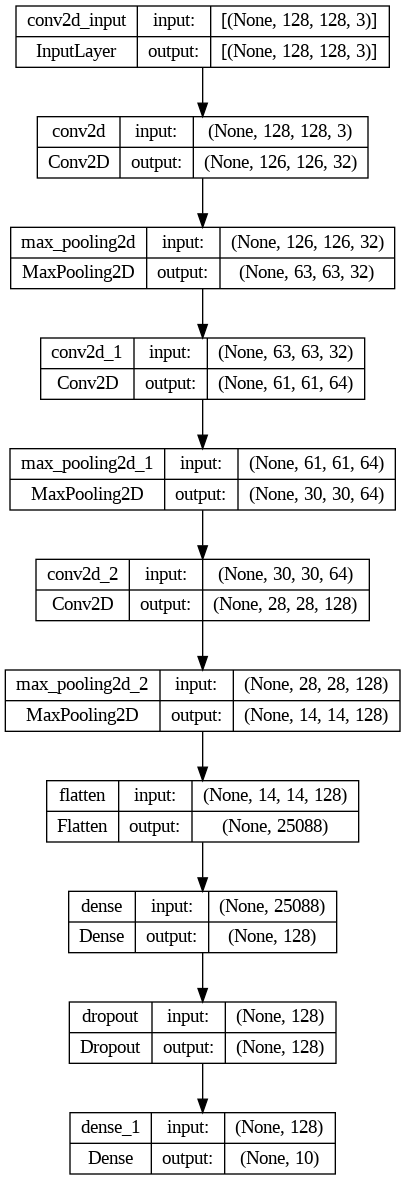

In [18]:

# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Create the model
model = tf.keras.models.load_model('my_model.h5')

# Plot the model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Display the plot
from IPython.display import Image
Image('model.png')


Found 4000 images belonging to 10 classes.
125/125 [==============================] - 52s 410ms/step
Predicted label: 9
True label: 0


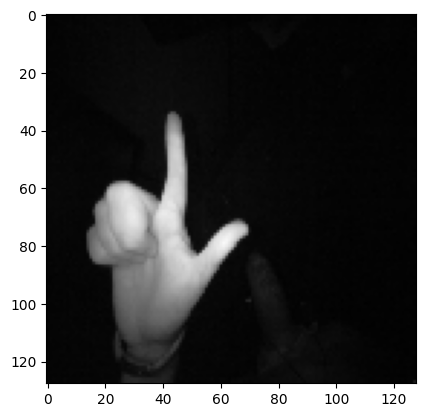

Predicted label: 6
True label: 0


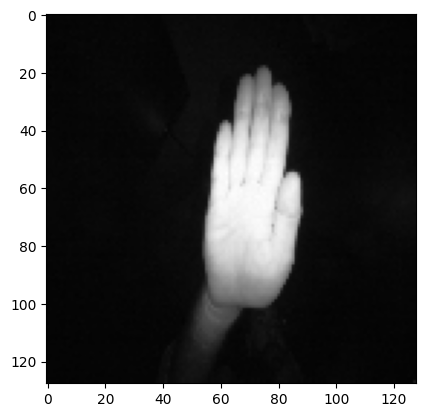

Predicted label: 7
True label: 0


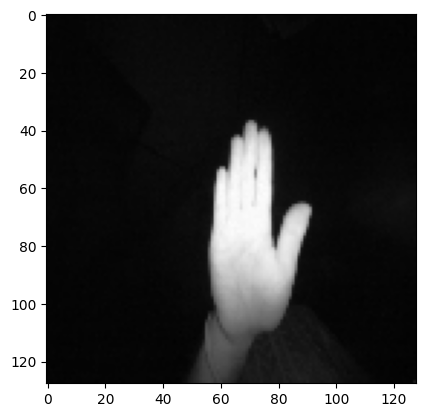

Predicted label: 6
True label: 0


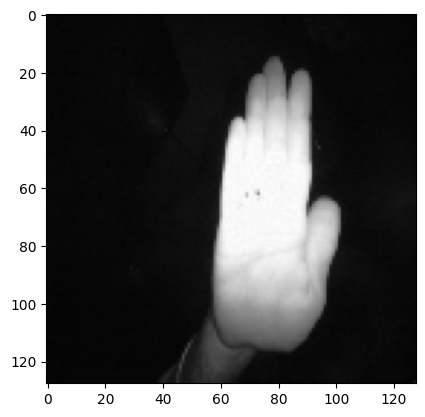

Predicted label: 9
True label: 0


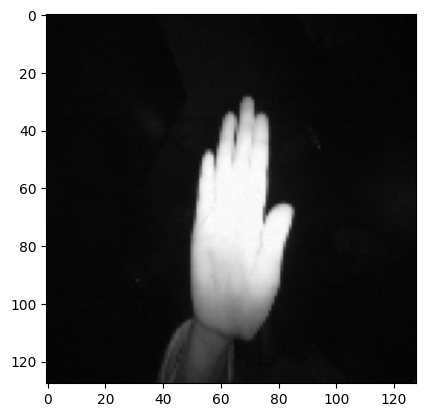

Predicted label: 6
True label: 0


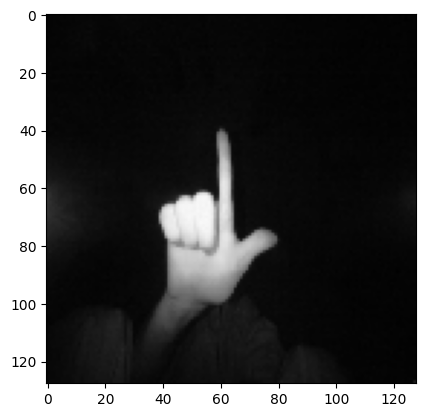

Predicted label: 4
True label: 0


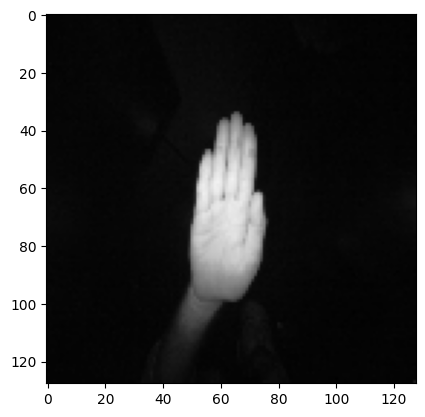

Predicted label: 5
True label: 0


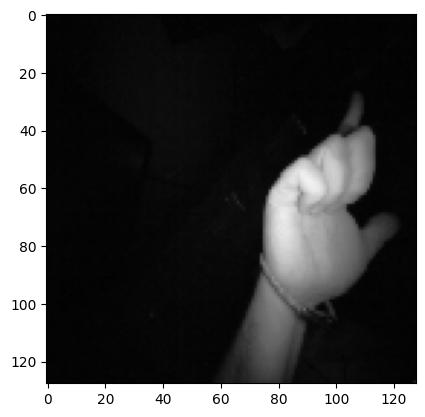

Predicted label: 4
True label: 0


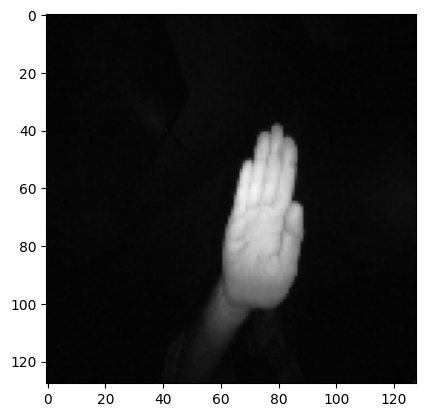

Predicted label: 7
True label: 0


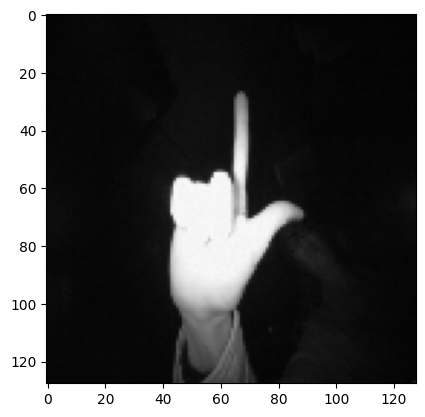

In [24]:
import matplotlib.pyplot as plt

# Load the test data
test_generator = train_datagen.flow_from_directory(
        '/content/leapGestRecog',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

# Make predictions
predictions = model.predict(test_generator, steps=test_generator.samples // 32)

# Get the predicted labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = test_generator.classes

# Print the predicted images
for i in range(10):
    print("Predicted label:", predicted_labels[i])
    print("True label:", true_labels[i])
    plt.imshow(test_generator[i][0][0])
    plt.show()
